## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. This project is aimed at understanding the results of an A/B test run by an e-commerce website and help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability



In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [3]:
#Read data and display a few rows
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.shape

(294478, 5)

There are 294478 rows and 5 columns in the dataset.

In [5]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

c. There are 290584 unique users in the dataset.

In [6]:
# mean of users converted
df['converted'].mean()

0.11965919355605512

The proportion of users converted is ~12%

In [9]:
# Find the number of unmatched new_page and treatment in the data set
treatment_old_page = df.query('group == "treatment" and landing_page == "old_page"')
control_new_page = df.query('group == "control" and landing_page == "new_page"')
treatment_old_page.shape[0]

1965

In [10]:
control_new_page.shape[0]

1928

In [11]:
total_nomatch = treatment_old_page.shape[0] + control_new_page.shape[0]
total_nomatch

3893

The 3863 number of times the `new_page` and `treatment` don't line up.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


 There are  no missing values in the dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.   

In [7]:
# remove all the treatment data which does not match 
df.drop(df.query('group == "treatment" and landing_page == "old_page"').index, inplace = True)


In [8]:
#remove all the control data which does not match
df.drop(df.query('group == "control" and landing_page == "new_page"').index, inplace = True)

In [10]:
# Create a new dataframe df2 and display few rows
df2=df
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [17]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

There is one duplicate user_id 773192

In [11]:
# Display row information of user_id with duplicate rows
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
# Removing duplicate row from df2 dataframe
df2.drop(labels=2893, axis=0, inplace=True)

In [12]:
#check to see if the duplicate user_id is removed
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
df2.converted.mean()

0.11959667567149027

The probability of an individual converting regardless of the page they receive id 11.95%.

In [14]:
control_df2 = df2.query('group == "control"')
control_df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [15]:
control_df2.converted.mean()

0.1203863045004612

Given that an individual was in the `control` group, the probability they converted is 12.03%

In [16]:
treatment_df2 = df2.query('group == "treatment"')
treatment_df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [17]:
treatment_df2.converted.mean()

0.11880724790277405

Given that an individual was in the `treatment` group, the probability they converted is 11.88%

In [18]:
# From the previous analysis we know the control group received the old page and the 
# treatment group received the new page.

prob_new_page = len(df.query('group == "treatment"'))/df2.shape[0]
prob_new_page

0.5000636646764286

The probability that an individual received the new page is 0.5000

#### Explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.
From the above results we see that the probability of control group conversion is 12.03% and that of treatment group is 11.88% . We can see the difference between the control group and treatement group conversion 0.15. Probability that an individual recieved a new page is roughly 0.5. Though the control group conversion is higher than treatment group the difference is very minimal. Hence we cannot say for sure if new treatment page leads to more conversion.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

##### Answer
The Null hypothesis is the new page is only as good as the old page and the alternate hypothesis( the thing that we want to prove) is new page is better than the old page.

$$ H_0 : p_{new} \leq p_{old}$$
$$ H_1 : p_{new} > p_{old}$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
ctr_new = df2['converted'].mean()
ctr_new

0.11959667567149027

The convert rate for $p_{new}$ under null is 0.1195

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
ctr_old =df2['converted'].mean()
ctr_old

0.11959667567149027

The convert rate for $p_{old}$ under null is 0.1195

c. What is $n_{new}$?

In [23]:
n_new = df2[df2['group'] == "treatment"].shape[0]
n_new

145311

$n_{new}$ is 145311

d. What is $n_{old}$?

In [24]:
n_old = df2[df2['group'] == "control"].shape[0]
n_old

145274

$n_{old}$ is 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
#new_page_converted = np.random.binomial(n_new,ctr_new)
new_page_converted = np.random.choice([1, 0], size=n_new, p=[ctr_new, (1-ctr_new)])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
new_page_converted.mean()

0.12052081397829482

In [28]:
#old_page_converted = np.random.binomial(n_old,ctr_old)
old_page_converted = np.random.choice([1, 0], size=n_old, p=[ctr_old, (1-ctr_old)])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
old_page_converted.mean()

0.12017979817448408

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean()-old_page_converted.mean()
#new_page_converted/n_new - old_page_converted/n_old

0.00034101580381074026

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [31]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[ctr_new, (1-ctr_new)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[ctr_old, (1-ctr_old)])
    diff = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5,1,'P_diffs For 10000 Simulated Values')

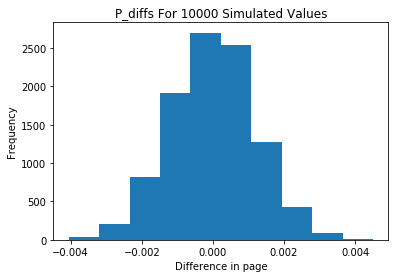

In [32]:
plt.hist(p_diffs)
plt.xlabel("Difference in page")
plt.ylabel("Frequency")
plt.title("P_diffs For 10000 Simulated Values")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff

-0.0015790565976871451

In [35]:
p_diffs = np.array(p_diffs)
(act_diff < p_diffs).mean()

0.9085

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### In part j we computing the p-value P-value is defined as the probability of seeing a particular result (or greater) from zero, assuming that the null hypothesis is TRUE. The p-value is 0.9085 it is greater than 0.05 which indicates weak evidence againgst the null hypothesis. Hence we fail to reject the null hypothesis. In this case we fail to reject the new page is only as good as the old page .

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = df2[df2['group'] == "control"].shape[0]
n_new = df2[df2['group'] == "treatment"].shape[0]

#Check values
convert_old ,convert_old,n_old,n_new

(17489, 17489, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [43]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3116075339133115 0.905173705140591


In [44]:
from scipy.stats import norm

norm.cdf(z_score)
# 0.9999999383005862 # Tells us how significant our z-score is

0.905173705140591

In [46]:
norm.ppf(1-(0.05))

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### The Z score is the number of standard deviations above or below the population mean. The p-value is the probability that you have falsely rejected the null hypothesis. In this case the z-score is 1.311 is less than the critical value of 1.644 we fail to we reject the null hypothesis . Similarly the p-value is 0.905 is greater than 0.05 hence we fail to reject the null hypothesis. The finidng in part j and part k agree to fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Since the converted data whic is categorical data represented as 0 and 1 we use Logistic Regression in this case.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
# Create intercept column
df2['intercept'] = 1

In [48]:
# Create dummy variable for page user
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [49]:
import statsmodels.api as sm

log_mod = sm.Logit(df2['converted'],df2[['intercept' ,'treatment']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-26 23:38 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### The p-value associated with ab_page(treatment) is 0.189 . The test performed in Part II is a one sided test and logistic regression is a two sided test. The null and alternative hypothesis for regression model is as follows.

$$ H_0 : p_{new} = p_{old}$$
$$ H_1 : p_{new} \neq p_{old}$$


The H0 - null hypothesis is that the p_{new} is equal to p_{old}. Alternate hypothesis is p_{new} not equal to p_{old}. If the p-value is more than (0.05 ), it is not statistically significant. Hence the changes in the predictor are not associted with changes in response. 



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Adding  other variables that might influence the converted can be both advantages and disadvantages.

Advantages : It is always a good idea to add other variable which will influence whether or not an individual converts. Adding independent variables to a logistic regression model will always increase the amount of variance explained in the log odds. Features like the region from which the page is accessed, the time period an individual spends on the page , an individuals age, gender can all have a postive influence on whether or not an individual converts.

Disadvantages:
The main disadvantage of adding more and more variables to the model can result in overfitting. It is necessary to choose variable which have more infleunce on the output. 


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [59]:
df_countries = pd.read_csv('./countries.csv')
df_countries.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [67]:
df_new = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [68]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,0,1


In [69]:
df_new['country'].value_counts()

US    203620
UK     72466
CA     14499
Name: country, dtype: int64

In [91]:
#proprtion of individuals in treatment group who converted in US
df_new.query("group == 'treatment' and country == 'US'")['converted'].mean()

0.11846443711728685

In [92]:
#proprtion of individuals in treatment group who converted in UK
df_new.query("group == 'treatment' and country == 'UK'")['converted'].mean()

0.1211709965102753

In [93]:
#proprtion of individuals in treatment group who converted in CA
df_new.query("group == 'treatment' and country == 'CA'")['converted'].mean()

0.11190247911245035

In [94]:
#proprtion of individuals in control group who converted in US
df_new.query("group == 'control' and country == 'US'")['converted'].mean()

0.12062998938220143

In [95]:
#proprtion of individuals in control group who converted in Uk
df_new.query("group == 'control' and country == 'UK'")['converted'].mean()

0.12002200220022002

In [96]:
#proprtion of individuals in treatment group who converted in CA
df_new.query("group == 'control' and country == 'CA'")['converted'].mean()

0.11878299527646569

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [72]:
### Fit Your Linear Model And Obtain the Results
mod = sm.Logit(df_new['converted'], df_new[['intercept','treatment', 'US', 'CA']])

results = mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-27 17:57 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4143  0.0000  -2.0043  -1.9544
treatment    -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
US           -0.0099    0.0133    -0.7437  0.4570  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

In [73]:
np.exp(0.0099), np.exp(0.0506)

(1.0099491671175422, 1.0519020483004984)

In the above logistic model UK is considered as the baseline as it is not included in the regression model. We can say that US users are 1.009 times as likely to convert when compared to UK users. Similarly, we would say that Canadaian users are 1.05 times as likely to convert when comapred to UK users.

The p-values is more than (0.05) hence the effect is not statistically significant.


#### Conclusion

In summary in Part II (A/B test) we observe that the p-value is greater than 0.05 indicates weak eveidence against null hypothesis . Hence we fail to reject the null hypothesis. Which means the new page is only as good as the old page.

In Part III we used logistic regression and found p-value is more than (0.05 ), it is not statistically significant. We also included country parameters to see how it influences the results. Here also we found the p-value to be greater for the countries suggesting the countries were not statistcally significant in influencing the conversion rates.

Prehaps more test has to done with diferrent varibles such as time spent on a web page, age , gender and also may be if the test is performed for a longer interval the results may vary. For now it seems the e-commerce company needs to stick to their old page.

